This notebook is for measuring the accuracy of the model on the human-annotated CSV.

In [1]:
import os
import csv
import pandas as pd
# import numpy as np

# change the working directory one up
os.chdir("..")  # change the working directory one up

In [2]:
model_output = pd.read_csv('path/to/output.csv')
# model_output = pd.read_csv('experiments/2024-10-11/test5.csv')
# ground_truth = pd.read_csv('experiments/folds/gt5.csv')
ground_truth = pd.read_csv('path/to/data.csv')

In [5]:
# Create dictionary to map column in ground truth to column in model output
ground_truth_columns = {
    "Active_bleeding_from_named_vessel": "extract_active_bleed_vessel",
    "Active_bleeding_from_solid_organ": "extract_active_bleed_solid_organ",
    "Bowel_resection": "extract_bowel_resection",
    "Class_I": "extract_wound_class_1",
    "Class_II": "extract_wound_class_2",
    "Class_III": "extract_wound_class_3",
    "Class_IV": "extract_wound_class_4",
    "Colostomy": "extract_colostomy",
    "Fascia_Closed_(Interrupted)": "extract_fascia_closure_interrupted",
    "Fascia_Closed_(Running/Continuous)": "extract_fascia_closure_continuous",
    "Fascia_Left_Open": "extract_fascia_left_open",
    "Hand-Sewn_Anastomosis": "extract_bowel_anastomosis_hand_sewn",
    "Ileostomy": "extract_ileostomy",
    "Primary_Repair": "extract_primary_bowel_repair",
    "Serosal_tear_repair": "extract_serosal_tear_repair",
    "Skin_Closed_(Full w/ Prevena)": "extract_skin_closure_full",
    "Skin_Closed_(Full)": "extract_skin_closure_full",
    "Skin_Closed_(Partial)": "extract_skin_closure_partial",
    "Skin_Left_Open": "extract_skin_closure_open",
    "Stapled_Anastomosis": "extract_bowel_anastomosis_stapled",
    "Synthetic": "extract_synthetic_mesh_use",
}

In [7]:
# F1 Score

# correct_predictions = 0
# total_predictions = 0

# This will be a list of dictionaries with correct_answer, model_prediction, and prediction_explanation
wrong_answer_explanations = []

pred = {}
for column in ground_truth_columns:
    pred[f"{column}"] = {}
    pred[f"{column}"]["tp"] = 0
    pred[f"{column}"]["tn"] = 0
    pred[f"{column}"]["fp"] = 0
    pred[f"{column}"]["fn"] = 0
    pred[f"{column}"]["dk"] = 0     # "Don't know"; this is where the model output is "-1"

# Simpler version ignoring the skin closure tasks
for i in range(len(ground_truth)):
    # Assert that the op_note_id is the same for both dataframes
    assert ground_truth.at[i, "ID"] == model_output.at[i, "op_note_id"], f"i: {i}, ground_truth.at[i, 'ID']: {ground_truth.at[i, 'ID']}, model_output.at[i, 'op_note_id']: {model_output.at[i, 'op_note_id']}"
    for column in ground_truth_columns:
        print(f"i: {i}, column: {column}")
        if ground_truth.at[i, column] == model_output.at[i, ground_truth_columns[column]]:
            if ground_truth.at[i, column] == 1:
                pred[f"{column}"]["tp"] += 1
            else:
                pred[f"{column}"]["tn"] += 1
        elif model_output.at[i, ground_truth_columns[column]] in {0,1}:
            wrong_answer_explanations.append({
                "patient_id": ground_truth.at[i, "ID"],
                "task": column,
                "correct_answer": ground_truth.at[i, column],
                "model_prediction": model_output.at[i, ground_truth_columns[column]],
                "prediction_explanation": model_output.at[i, ground_truth_columns[column] + "_explanation"],
                "op_note": ground_truth.at[i, "Text_desc"]
            })
            if ground_truth.at[i, column] == 1:
                pred[f"{column}"]["fn"] += 1
            else:
                pred[f"{column}"]["fp"] += 1
        else:
            wrong_answer_explanations.append({
                "patient_id": ground_truth.at[i, "ID"],
                "task": column,
                "correct_answer": ground_truth.at[i, column],
                "model_prediction": model_output.at[i, ground_truth_columns[column]],
                "prediction_explanation": model_output.at[i, ground_truth_columns[column] + "_explanation"],
                "op_note": ground_truth.at[i, "Text_desc"]
            })
            pred[f"{column}"]["dk"] += 1



i: 0, column: Active_bleeding_from_named_vessel
i: 0, column: Active_bleeding_from_solid_organ
i: 0, column: Bowel_resection
i: 0, column: Class_I
i: 0, column: Class_II
i: 0, column: Class_III
i: 0, column: Class_IV
i: 0, column: Colostomy
i: 0, column: Fascia_Closed_(Interrupted)
i: 0, column: Fascia_Closed_(Running/Continuous)
i: 0, column: Fascia_Left_Open
i: 0, column: Hand-Sewn_Anastomosis
i: 0, column: Ileostomy
i: 0, column: Primary_Repair
i: 0, column: Serosal_tear_repair
i: 0, column: Skin_Closed_(Full w/ Prevena)
i: 0, column: Skin_Closed_(Full)
i: 0, column: Skin_Closed_(Partial)
i: 0, column: Skin_Left_Open
i: 0, column: Stapled_Anastomosis
i: 0, column: Synthetic
i: 1, column: Active_bleeding_from_named_vessel
i: 1, column: Active_bleeding_from_solid_organ
i: 1, column: Bowel_resection
i: 1, column: Class_I
i: 1, column: Class_II
i: 1, column: Class_III
i: 1, column: Class_IV
i: 1, column: Colostomy
i: 1, column: Fascia_Closed_(Interrupted)
i: 1, column: Fascia_Closed_(Ru

i: 103, column: Hand-Sewn_Anastomosis
i: 103, column: Ileostomy
i: 103, column: Primary_Repair
i: 103, column: Serosal_tear_repair
i: 103, column: Skin_Closed_(Full w/ Prevena)
i: 103, column: Skin_Closed_(Full)
i: 103, column: Skin_Closed_(Partial)
i: 103, column: Skin_Left_Open
i: 103, column: Stapled_Anastomosis
i: 103, column: Synthetic
i: 104, column: Active_bleeding_from_named_vessel
i: 104, column: Active_bleeding_from_solid_organ
i: 104, column: Bowel_resection
i: 104, column: Class_I
i: 104, column: Class_II
i: 104, column: Class_III
i: 104, column: Class_IV
i: 104, column: Colostomy
i: 104, column: Fascia_Closed_(Interrupted)
i: 104, column: Fascia_Closed_(Running/Continuous)
i: 104, column: Fascia_Left_Open
i: 104, column: Hand-Sewn_Anastomosis
i: 104, column: Ileostomy
i: 104, column: Primary_Repair
i: 104, column: Serosal_tear_repair
i: 104, column: Skin_Closed_(Full w/ Prevena)
i: 104, column: Skin_Closed_(Full)
i: 104, column: Skin_Closed_(Partial)
i: 104, column: Skin_L

In [49]:
# Skin closure version
for i in range(len(ground_truth)):
    for column in ground_truth_columns:
        if column == "Skin_Closed_(Full w/ Prevena)" or column == "Skin_Closed_(Full)" or column == "Skin_Closed_(Partial)":
            if column == "Skin_Closed_(Full w/ Prevena)":
                if ground_truth.at[i, column] == "1" and model_output.at[i, "extract_skin_closure"] == 2:
                    pred[f"{column}"]["tp"] += 1
            elif column == "Skin_Closed_(Full)":
                if ground_truth.at[i, column] == "1" and model_output.at[i, "extract_skin_closure"] == 2:
                    pred[f"{column}"]["tp"] += 1
            elif column == "Skin_Closed_(Partial)":
                if ground_truth.at[i, column] == "1" and model_output.at[i, "extract_skin_closure"] == 1:
                    correct_predictions += 1
        elif ground_truth.at[i, column] == model_output.at[i, ground_truth_columns[column]]:
            if ground_truth.at[i, column] == 1:
                pred[f"{column}"]["tp"] += 1
            else:
                pred[f"{column}"]["tn"] += 1
        elif model_output.at[i, ground_truth_columns[column]] in {0,1}:
            wrong_answer_explanations.append({
                "patient_id": ground_truth.at[i, "ID"],
                "task": column,
                "correct_answer": ground_truth.at[i, column],
                "model_prediction": model_output.at[i, ground_truth_columns[column]],
                "prediction_explanation": model_output.at[i, ground_truth_columns[column] + "_explanation"],
                "op_note": ground_truth.at[i, "Text_desc"]
            })
            if ground_truth.at[i, column] == 1:
                pred[f"{column}"]["fn"] += 1
            else:
                pred[f"{column}"]["fp"] += 1
        else:
            wrong_answer_explanations.append({
                "patient_id": ground_truth.at[i, "ID"],
                "task": column,
                "correct_answer": ground_truth.at[i, column],
                "model_prediction": model_output.at[i, ground_truth_columns[column]],
                "prediction_explanation": model_output.at[i, ground_truth_columns[column] + "_explanation"],
                "op_note": ground_truth.at[i, "Text_desc"]
            })
            pred[f"{column}"]["dk"] += 1

In [8]:
# Create F1 Score for each task using pred dictionary
f1_scores = {}
for task in pred:
    tp = pred[task]["tp"]
    tn = pred[task]["tn"]
    fp = pred[task]["fp"]
    fn = pred[task]["fn"]
    dk = pred[task]["dk"]
    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0
    pred[task]["precision"] = precision
    pred[task]["recall"] = recall
    pred[task]["f1"] = f1
    f1_scores[task] = f1

In [10]:
df = pd.DataFrame(pred)
df.transpose()
# df.to_csv('experiments/folds/table5.csv', index=True)
df.to_csv('path/to/table.csv', index=True)

In [11]:
# Output pred and f1_scores to a txt file
with open('path/to/results.txt', 'a') as f:
# with open('experiments/folds/results1.txt', 'a') as f:
    for task in pred:
        f.write(f"Task: {task}\n")
        f.write(f"True Positives: {pred[task]['tp']}\n")
        f.write(f"True Negatives: {pred[task]['tn']}\n")
        f.write(f"False Positives: {pred[task]['fp']}\n")
        f.write(f"False Negatives: {pred[task]['fn']}\n")
        f.write(f"Don't Know: {pred[task]['dk']}\n")
        f.write(f"F1 Score: {f1_scores[task]}\n\n")
        f.write("\n")

In [12]:
# Output wrong_answer_explanations to a csv file grouped by task
wrong_answer_explanations_df = pd.DataFrame(wrong_answer_explanations)
wrong_answer_explanations_df = wrong_answer_explanations_df.sort_values(by=['task'])
wrong_answer_explanations_df.to_csv("path/to/wrong_answer_explanations.csv", index=False)

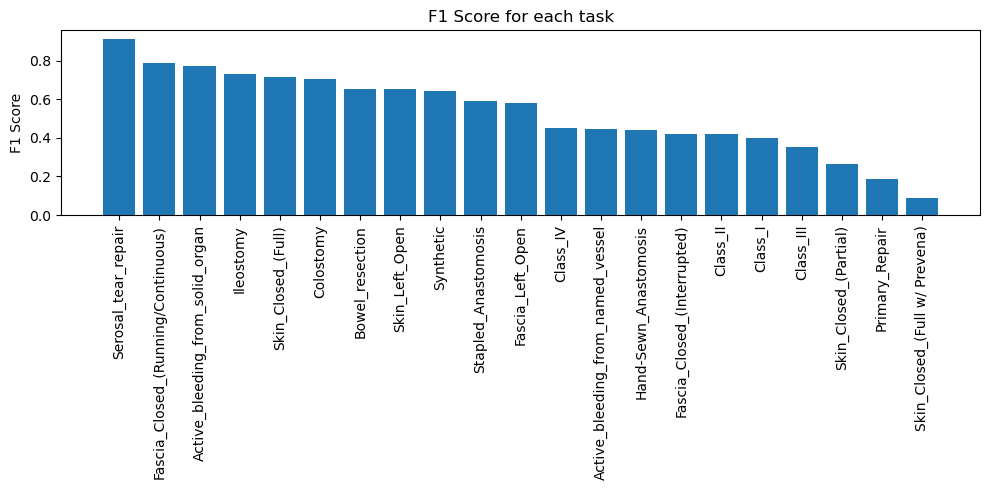

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot the F1 Score for each task with a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
# order the tasks by F1 Score
f1_scores = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))
plt.bar(f1_scores.keys(), f1_scores.values())
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("F1 Score for each task")
plt.tight_layout()
# plt.savefig("experiments/folds/f1_score_plot1.png")
plt.savefig("path/to/f1_score_plot.png")
plt.show()

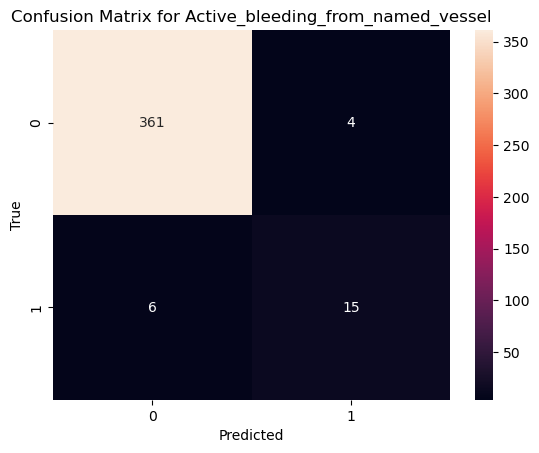

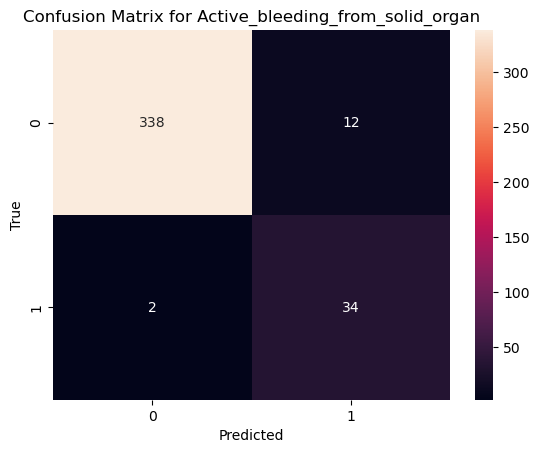

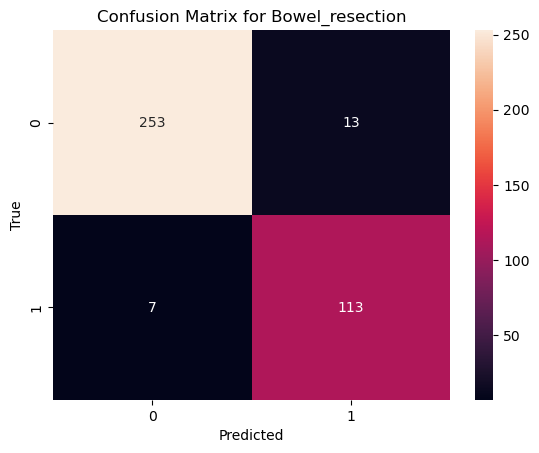

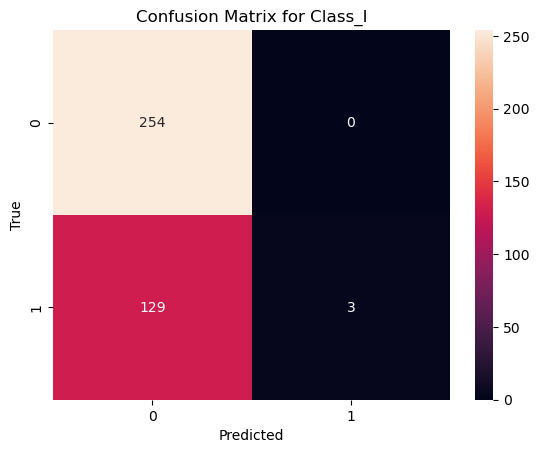

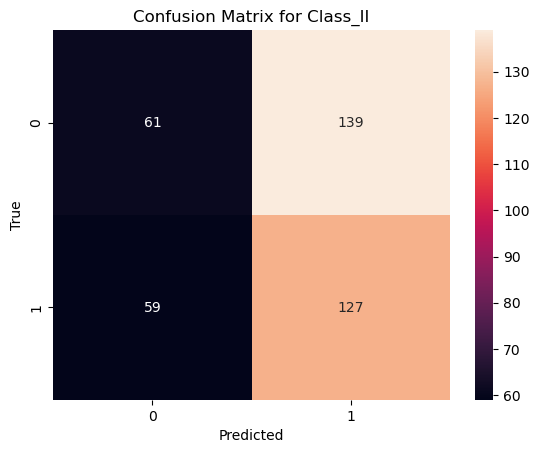

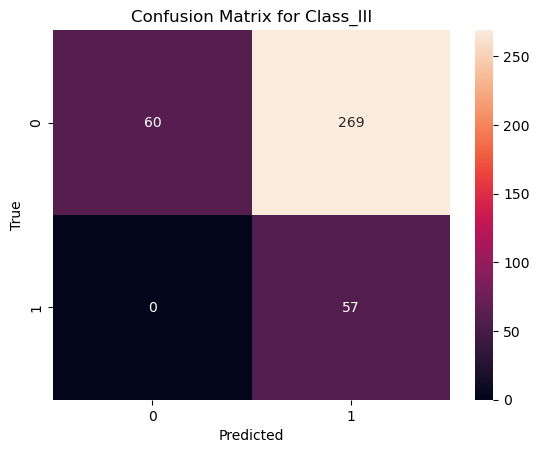

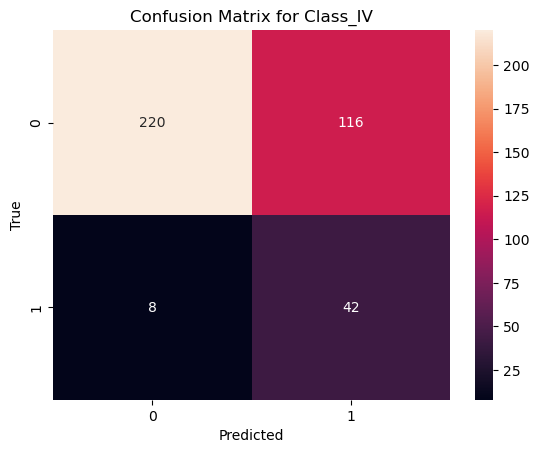

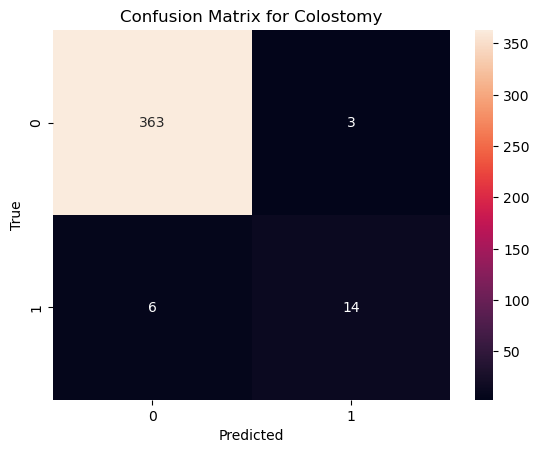

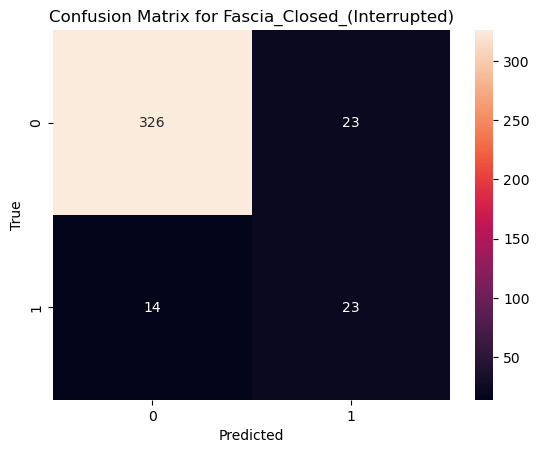

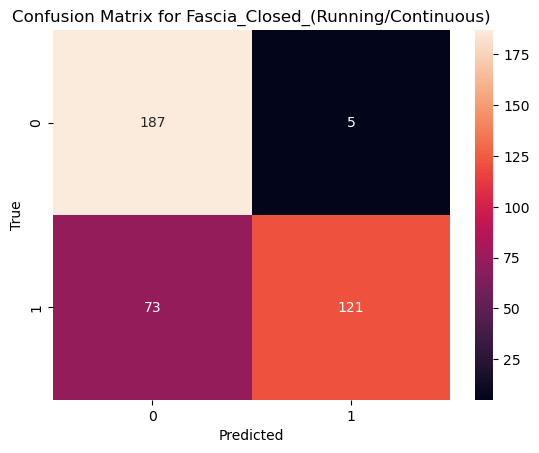

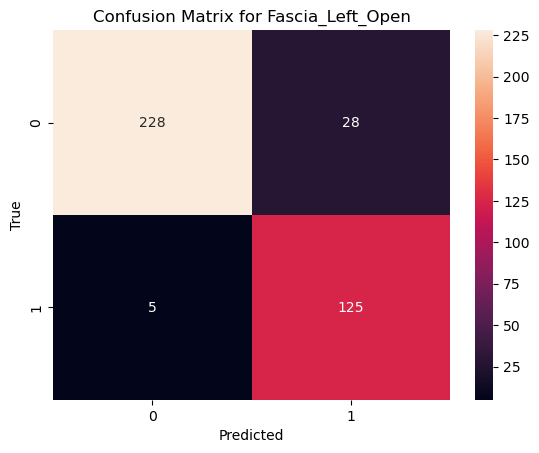

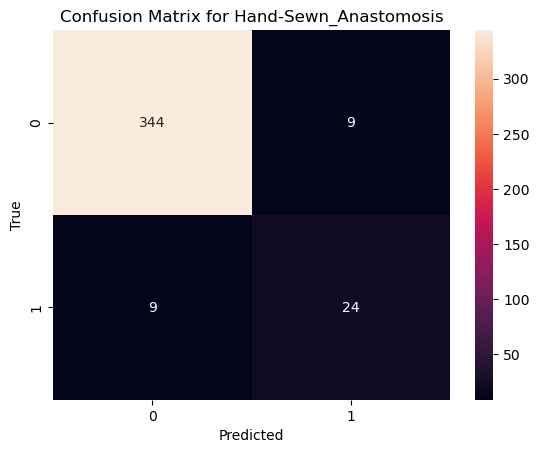

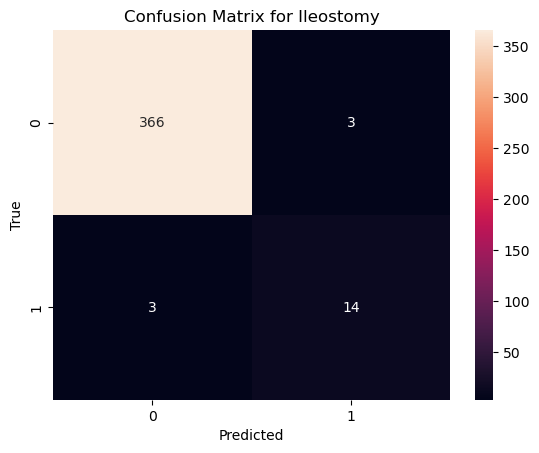

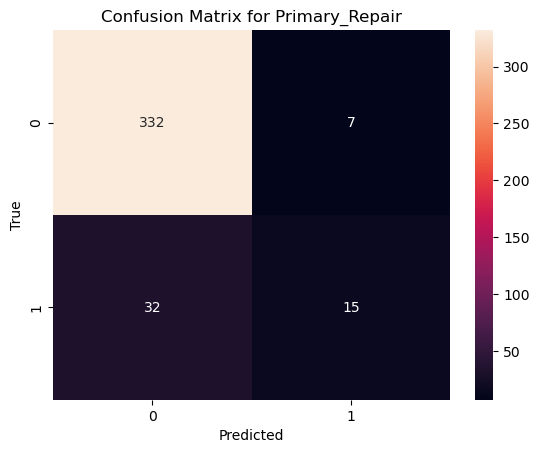

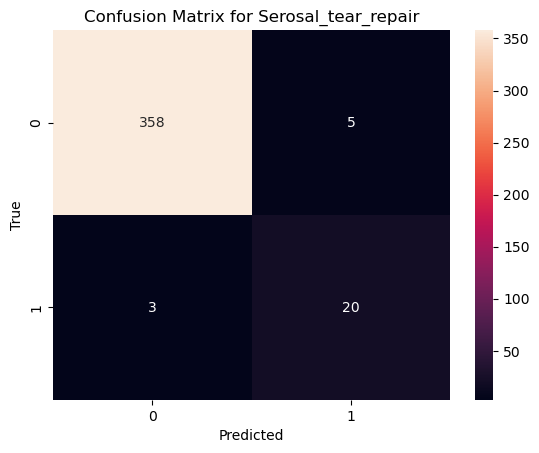

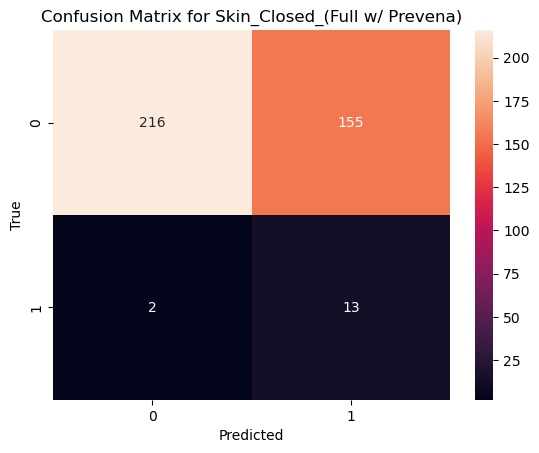

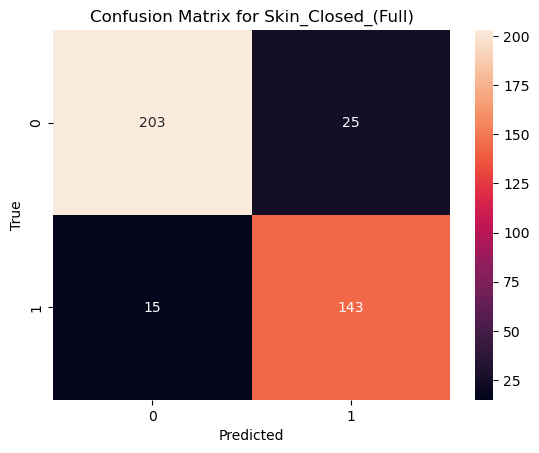

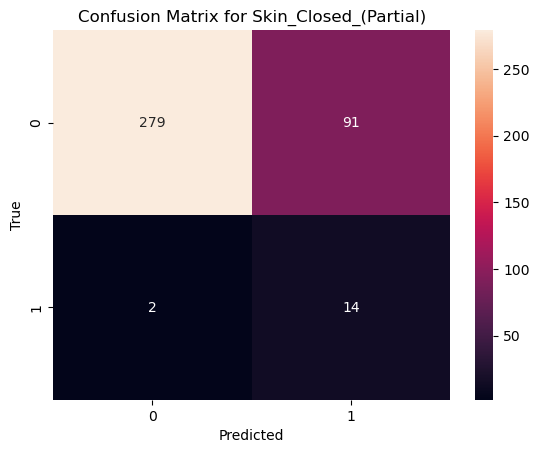

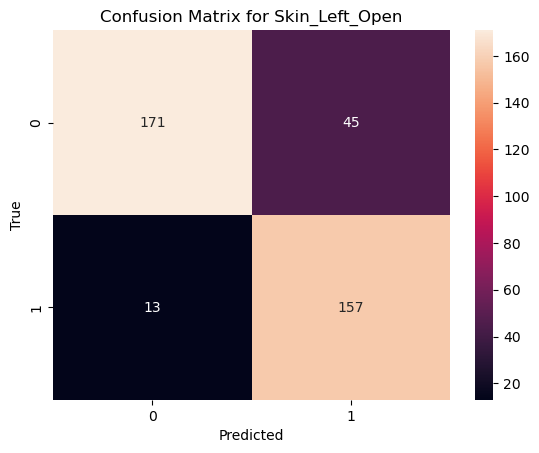

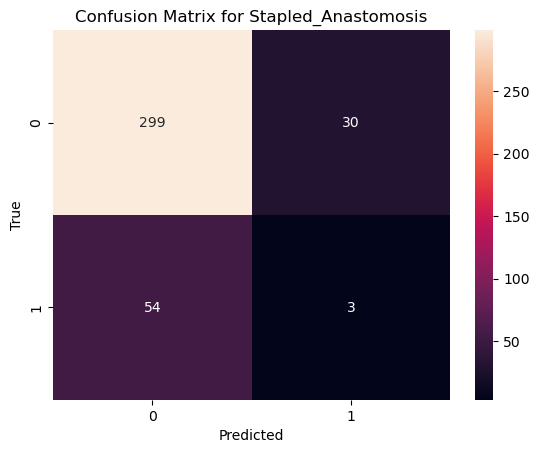

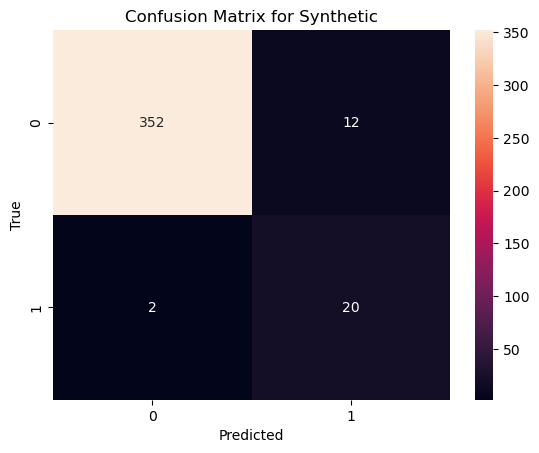

In [14]:
# Plot confusion matrix for each task
for task in pred:
    cm = confusion_matrix([1 if ground_truth.at[i, task] == 1 else 0 for i in range(len(ground_truth))], [1 if model_output.at[i, ground_truth_columns[task]] == 1 else 0 for i in range(len(ground_truth))])
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {task}")
    plt.show()